## INF2008 Machine Learning Assignment 01

In this assignment, we will be implementing a few algorithms from scratch. Please try to work through this in your groups. Although you can use generative tools for help, it is really critical for you to be able to understand every single line of the code so that it will help you further down the journey should you study more advanced neural network architectures.

The full marks for this assignment is 40 and it constitues 20% of your final grades

I will let you know the submission instructions nearer the submission date.

*   A1.0 Normalization. (2 marks)
*   A1.1 Create a simple MLP in pytorch. (5 marks)
*   A1.2 Create a simple perceptron using sklearn. (3 marks)
*   A1.3 Create a simple perceptron using python. (5 marks)
*   A1.4 Creation of Activation Functions (6 marks)
*   A1.5 Creation of Loss Functions (7 marks)
*   A1.6 Creation of Forward Functions (3 marks)
*   A1.7 Creation of Backward Functions (9 marks)

We first create the sample data. Here we will just be making a very simple 2 dimensional dataset.

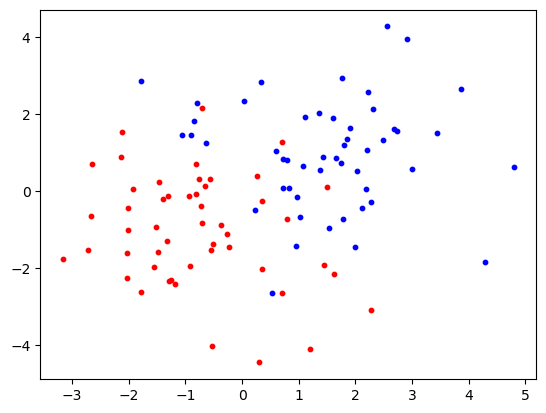

In [953]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [(-1, -1), (1, 1)]
cluster_std = [1.5, 1.5]

X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

We split it into the train test datasets so that everybody is using exactly the same data points.

In [954]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

View the training data

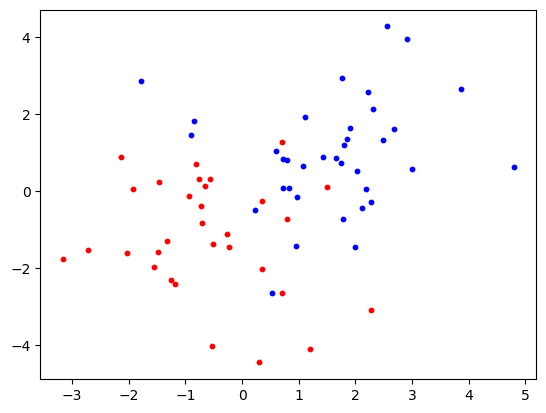

In [955]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="blue", s=10, label="Cluster2")

View the testing data.

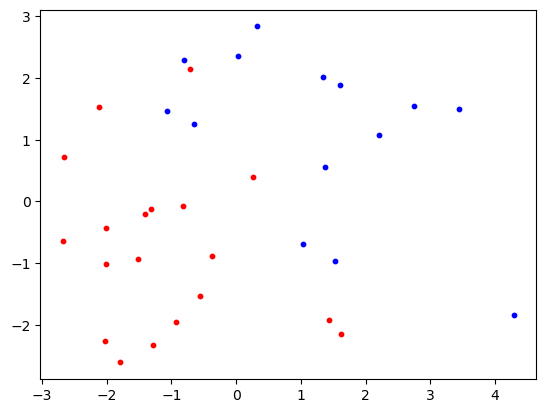

In [956]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color="blue", s=10, label="Cluster2")

In [957]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### A1.0 Normalization. (2 marks)

First we have to normalize the data properly. We normalize the data by using the following formula:


$X_{train} = \frac{X_{train} - \bar{X}_{train}}{\sigma_{X_{train}}}$

$X_{test} = \frac{X_{test} - \bar{X}_{train}}{\sigma_{X_{train}}}$




These are the first three lines of $X_{train}$

```
[-0.85682268,  1.03978436],
[ 0.23370412, -0.7659015 ],
[ 0.99482891,  0.0611624 ],
```

These are the first three lines of $X_{test}$

```
[-1.19657104, -0.08841231],
[-0.77660018,  1.22014734],
[-0.73311504,  0.7220799 ],
```

Write a function that normalizes the training and testing data according to the formula provided above.

In [958]:
def normalizedata(x_train, x_test):
    # Calculate mean and standard deviation of training data
    x_train_mean = np.mean(x_train, axis=0)
    x_train_std = np.std(x_train, axis=0)

    # Normalize training data
    x_train_normalized = (x_train - x_train_mean) / x_train_std

    # Normalize test data using mean and standard deviation of training data
    x_test_normalized = (x_test - x_train_mean) / x_train_std

    return x_train_normalized, x_test_normalized


X_train, X_test = normalizedata(X_train, X_test)

#### A1.1 Create a simple MLP in pytorch. (5 marks)

You can refer to the following tutorial for help:
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

Since we are going to use pytorch, convert the data to pytorch tensors.

In [959]:
import torch

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

Create a tensor dataset together with a dataloader of batch size of 8. The shuffle of the dataloader for the training data should be true, and that of the test should be false.

In [960]:
from torch.utils.data import TensorDataset, DataLoader

# Create TensorDatasets
training_data = TensorDataset(X_train_tensor, y_train_tensor)
testing_data = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader
training_dataloader = DataLoader(training_data, batch_size=8, shuffle=True)
testing_dataloader = DataLoader(testing_data, batch_size=8, shuffle=False)

Create and instantiate a MLP class. It should have just two functions, the __init__ function and the forward function.

The MLP should have the following parameters:

*   Layer 1 (input layer): input 2, output 64
*   RELU
*   Layer 2 (hidden layer): input 64, output 32
*   RELU
*   Layer 3 (output layer): input 32, output 2



```
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
      # todo

    def forward(self, x):
      # todo

model = MLP()
```



In [961]:
import torch
import torch.nn as nn


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential()
        self.layers.append(nn.Linear(2, 64))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(64, 32))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(32, 2))

    def forward(self, x):
        x = self.layers(x)

        return x

In [962]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP().to(device)

Set the optimizer to Adagrad with learning rate of 0.001. The loss should be CrossEntropyLoss

In [963]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.001)

The model should look like the following:

```
MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)
```



In [964]:
model

MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)

Now we need to run the training loop. Set the number of epochs to be 100. After which we run the following for each epoch:



```
# Training loop
num_epochs = todo

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Zero the gradients
        # Forward pass
        # Calculate the loss
        # Backward pass
        # Update weights

    if epoch % 20 == 0:
      print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

```



In [965]:
num_epocs = 100

for epoc in range(num_epocs):
    for inputs, labels in training_dataloader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = loss_function(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

    if epoc % 20 == 0:
        print(f'Epoc {epoc + 1}/{num_epocs}, Loss: {loss.item()}')

Epoc 1/100, Loss: 0.656984269618988
Epoc 21/100, Loss: 0.584128737449646
Epoc 41/100, Loss: 0.3809262216091156
Epoc 61/100, Loss: 0.4960455596446991
Epoc 81/100, Loss: 0.301970511674881


Now we carry out an evaluation of the model based on the test set. The steps are the following:



```
model.eval()  # Set the model to evaluation mode

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        # set the forward pass
        # get the predicted values
        # get the number of observations in batch
        # get the number of correct predictions

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')
```

Do note that to get the prediction, it will find out which index position is larger and set it to the correspnding index. An example:

*   [1.5, -0.5] will set the prediction to 0.
*   [0.5, 3.5] will set the prediction to 1.
*   [0.5, -3.5] will set the prediction to 0.


In [966]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels, in testing_dataloader:
        # set the forward pass
        outputs = model(inputs)

        # get predictions
        _, predictions = torch.max(outputs, 1)

        batch_size = labels.size(0)

        # get the number of observations in batch
        total += batch_size

        # get the number of correct predictions
        for prediction, label in zip(predictions, labels):
            correct += (prediction == label)

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 90.91%


#### A1.2 Create a simple perceptron using sklearn. (3 marks)

You can refer to the following tutorial for help:
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

Use the MLPClassifier to create a model with no hidden layer (single layer perceptron), lbfgs solver, max_iter of 1000, alpha of 0.001 and random_state of 1.

In [967]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(), solver='lbfgs', max_iter=1000, alpha=0.001, random_state=1)
classifier.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(), max_iter=1000, random_state=1,
              solver='lbfgs')

Print out the coefficients of the model.

In [968]:
classifier.coefs_

[array([[2.67785239],
        [2.23775085]])]

Print out the intercept of the model.

In [969]:
classifier.intercepts_

[array([0.57333197])]

Calculate the score of the model, based on the testing data.

In [970]:
score = classifier.score(X_test, y_test)
score

0.9090909090909091

#### A1.3 Create a simple perceptron using python. (5 marks)

For this perceptron, we will use the step activation function (similar to the activation function during the lecture about the AND / OR gates). Please create a perceptron class based on the following specifications.

The weights should be a zero-ed 2x1 numpy array, and bias a zero-ed 1x1 numpy array.

```
import numpy as np

class Perceptron:
    def __init__(self):
        self.weights = TODO
        self.bias = TODO

    def predict(self, inputs):
        # Do the forward pass
        # Apply a step function (binary threshold) as the activation function. The value of t of the step function should be 0.
        return prediction

    def train(self, inputs, targets, learning_rate=0.001, epochs=1000):
        for epoch in range(epochs):
            for i in range(len(inputs)):
                # Forward pass
                # Compute the error
                # Update weights and bias
```




In [971]:
class Perceptron:
    def __init__(self):
        self.weights = np.zeros((2, 1))
        self.bias = np.zeros((1, 1))

    def predict(self, inputs):
        # Do the forward pass
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Apply a step function (binary threshold) as the activation function. The value of t of the step function should be 0.
        prediction = np.where(weighted_sum >= 0, 1, 0)
        return prediction.flatten()

    def train(self, inputs, targets, learning_rate=0.001, epochs=1000):
        for epoch in range(epochs):
            for i in range(len(inputs)):
                # Forward pass
                prediction = self.predict(inputs[i])
                # Compute the error
                error = targets[i] - prediction
                # Update weights and bias
                self.weights += learning_rate * error * inputs[i].reshape(-1, 1)
                self.bias += learning_rate * error


In [972]:
perceptron = Perceptron()

# Train the perceptron
perceptron.train(X_train, y_train, learning_rate=0.01, epochs=1000)

# Make predictions
predictions = perceptron.predict(X_train)
correct = (predictions == y_train).sum().item()
correct / y_train.shape[0]

0.8805970149253731

In [973]:
# TODO: confirm what this is

'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)
'''


'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)\n\n# Create a logistic regression model\nmodel = LogisticRegression()\n\n# Fit the model to the training data\nmodel.fit(X_train, y_train)\n\n# Make predictions on the test data\ny_pred = model.predict(X_test)\n\n# Evaluate the model\naccuracy = model.score(X_test, y_test)\nprint("Accuracy:", accuracy)\n'

#### A1.4 Creation of Activation Functions (6 marks)

Create three classes, each class depicting one activation function, sigmoid, tanh and relu.

```
class Sigmoid():
    def __init__(self):
        return

    def forward(self, x):
        sigmoid_x = todo
        return sigmoid_x

    def derivative(self):
        return todo
```



The formulas are below:

$sigmoid(z) = \frac{1}{1+e^{-z}}$

$sigmoid.derivative() = sigmoid(z) - sigmoid(z)^2$

$tanh(z) = \frac{sinh(z)}{cosh(z)}$

$tanh.derivative(z) = 1 - tanh^2(z)$

$relu(z) = max(z, 0)$

$relu.derivative(z) = 1$ if $z \geq 0$

$relu.derivative(z) = 0$ if $z \lt 0$



In [1012]:
class Sigmoid():
    def __init__(self):
        return

    def forward(self, x):
        sigmoid_x = 1 / (1 + np.exp(-x))
        return sigmoid_x

    def derivative(self, x):
        return self.forward(x) - self.forward(x) ** 2


class Tanh():
    def __init__(self):
        return

    def forward(self, x):
        tanh_x = np.sinh(x) / np.cosh(x)
        return tanh_x

    def derivative(self, x):
        return 1 - self.forward(x) ** 2


class ReLU():
    def __init__(self):
        return

    def forward(self, x):
        relu_x = np.maximum(x, 0)
        return relu_x

    def derivative(self, x):
        return np.where(self.forward(x) > 0, 1, 0)


In [1013]:
sample_data = X_train[:5]
sigmoid = Sigmoid()

sample_data_sigmoid_forward = sigmoid.forward(sample_data)
sample_data_sigmoid_forward

array([[0.29800361, 0.7388084 ],
       [0.55816155, 0.31736636],
       [0.73004067, 0.51528583],
       [0.81576111, 0.58453408],
       [0.33404614, 0.55164329]])

In [1014]:
sample_data_sigmoid_derivative = sigmoid.derivative(sample_data)
sample_data_sigmoid_derivative

array([[0.20919746, 0.19297055],
       [0.24661723, 0.21664495],
       [0.19708129, 0.24976634],
       [0.15029492, 0.24285399],
       [0.22245932, 0.24733297]])

In [1015]:
tanh = Tanh()
sample_data_tanh_forward = tanh.forward(sample_data)
sample_data_tanh_forward

array([[-0.69461701,  0.7778029 ],
       [ 0.22954028, -0.64453992],
       [ 0.75941386,  0.06108625],
       [ 0.90293544,  0.32873961],
       [-0.59794427,  0.20439267]])

In [1016]:
sample_data_tanh_derivative = tanh.derivative(sample_data)
sample_data_tanh_derivative

array([[0.51750721, 0.39502265],
       [0.94731126, 0.58456829],
       [0.42329059, 0.99626847],
       [0.1847076 , 0.89193027],
       [0.64246264, 0.95822363]])

In [1017]:
relu = ReLU()
sample_data_relu_forward = relu.forward(sample_data)
sample_data_relu_forward

array([[0.        , 1.03978436],
       [0.23370412, 0.        ],
       [0.99482891, 0.0611624 ],
       [1.4878883 , 0.34141449],
       [0.        , 0.20731248]])

In [1018]:
sample_data_relu_derivative = relu.derivative(sample_data)
sample_data_relu_derivative

array([[0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1]])

#### A1.5 Creation of Mean Square Error Loss Function (7 marks)

Here we will assume that A is the output from the network and Y is the ground truth. We will calculate the mean square error through the following vector formula. We assume that the size of A is a N x C matrix.

$MSE = \frac{1}{2N * C} (A - Y)^2$

The derivative would be just:

$MSE.derivative = A - Y$

```
class MSELoss:
    def forward(self, A, Y):
        N      = dimension 0 of A
        C      = dimension 1 of A
        se     = sum of errors
        sse    = squared sum of errors
        mse    = todo
        
        return mse
    
    def backward(self):    
        dLdA = todo        
        return dLdA

```

In [1052]:
class MSELoss:
    def forward(self, A, Y):
        N = A.shape[0]
        C = A.shape[1]
        se = np.sum((A - Y) ** 2)
        sse = np.sum((A - Y) ** 2)
        mse = se / (2 * N * C)

        return mse

    def backward(self, A, Y):
        dLdA = 2 * (self.forward(A, Y) - Y) / (A.shape[0] * A.shape[1])
        return dLdA


In [1053]:
from numpy import random

N = 5
C = 4
random.seed(5)
Y = random.random(size=(N, C))
print(Y)

random.seed(8)
A = Y + random.random(size=(N, C)) / 10
print(A)

[[0.22199317 0.87073231 0.20671916 0.91861091]
 [0.48841119 0.61174386 0.76590786 0.51841799]
 [0.2968005  0.18772123 0.08074127 0.7384403 ]
 [0.44130922 0.15830987 0.87993703 0.27408646]
 [0.41423502 0.29607993 0.62878791 0.57983781]]
[[0.30933611 0.96758637 0.29363861 0.97169648]
 [0.51168402 0.61288374 0.80895474 0.55865312]
 [0.34906797 0.23556041 0.13627692 0.7927789 ]
 [0.51739878 0.22954733 0.94190524 0.31669564]
 [0.44314252 0.39346546 0.66216531 0.60171792]]


In [1054]:
mseloss = MSELoss()
mseloss.forward(A, Y)

0.0017721782766606132

In [1055]:
mseloss.backward(A, Y)

array([[-0.0220221 , -0.08689601, -0.0204947 , -0.09168387],
       [-0.0486639 , -0.06099717, -0.07641357, -0.05166458],
       [-0.02950283, -0.01859491, -0.00789691, -0.07366681],
       [-0.0439537 , -0.01565377, -0.08781649, -0.02723143],
       [-0.04124628, -0.02943078, -0.06270157, -0.05780656]])

#### A1.6 Creation of Forward Functions (3 marks)

This section and the next focuses on just a single layer within the neural network. We are going to write how to carry out the forward pass, as well as the backward pass. The forward pass should be very simple.

We will be using the following structure:

```
import numpy as np

class Linear:
    
    def __init__(self, in_features, out_features, debug = False):    
        self.W    = np.zeros((out_features, in_features), dtype="f")
        self.b    = np.zeros((out_features, 1), dtype="f")
        self.dLdW = np.zeros((out_features, in_features), dtype="f")
        self.dLdb = np.zeros((out_features, 1), dtype="f")

    def forward(self, A):    
        self.A    = A
        self.N    = A.shape[0]
        self.Ones = np.ones((self.N,1), dtype="f")
        Z         = todo
        
        return Z

You just need to write the line to calculate the value of Z.

Z is defined as:

$Z = A ·W^T + I.b^T$


$I$ is the identity vector so that the numbers work out.

In [1050]:
class Linear:
    def __init__(self, in_features, out_features, debug=False):
        self.W = np.ones((out_features, in_features), dtype="f")
        self.b = np.zeros((out_features, 1), dtype="f")
        self.dLdW = np.zeros((out_features, in_features), dtype="f")
        self.dLdb = np.zeros((out_features, 1), dtype="f")

    def forward(self, A):
        self.A = A
        self.N = A.shape[0]
        self.Ones = np.ones((self.N, 1), dtype="f")
        Z = np.dot(A, self.W.T) + np.dot(self.Ones, self.b.T)

        return Z

    def backward(self, dLdZ):
        dZdA = self.W
        dZdW = self.A
        dZdb = self.Ones
        dLdA = np.dot(dLdZ, dZdA.T)
        dLdW = np.dot(dLdZ.T, dZdW) / self.N
        dLdb = np.dot(dLdZ.T, dZdb) / self.N
        dLdi = None
        dZdi = None

        # Accumulate gradients
        self.dLdW = dLdW
        self.dLdb = dLdb


In [1051]:
C_in = C
C_out = 1
linear_layer = Linear(C_in, C_out, True)
Z = linear_layer.forward(A)
print(Z)

[[2.54225757]
 [2.49217563]
 [1.51368419]
 [2.00554699]
 [2.10049121]]


#### A1.7 Creation of Backward Functions (9 marks)

Finally we fill up the backward propogation of a layer.

Recall we have the form

$Z = A ·W^T + I.b^T$

The derivative of Z with respect to A is W^T.

The derivative of Z with respect to W is A.

The derivative of Z with respect to b is I.

The derivative of L with respect to A is

$dLdA = dLdZ . dZdA^T$ (dLdZ is passed into the function)

$dLdW = dLdZ^T . dZdW$

$dLdb = dLdZ^T . dZdb$




```
    def backward(self, dLdZ):    
        dZdA      = todo
        dZdW      = todo
        dZdb      = todo
        dLdA      = todo
        dLdW      = todo
        dLdb      = todo
        dLdi      = None
        dZdi      = None
```

